Homework 3 for the Fall 2024 Course "Machine Learning for Materials Science", University of Tennessee Knoxville, Department of Materials Science and Engineering.

- Instructor Sergei V. Kalinin

- The atoms data set is gracefully provided by Prof. Rampi Ramprasad, Georgia Instutute of Technology

**Please add student name and date**

# Start with the basics!

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

import pandas as pd
import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler

## Import Atom Dataset

In [ ]:
!gdown https://drive.google.com/uc?id=1SygYRQ4Iom2ZP7dANIyay7NIoCra2bE1

Downloading...
From: https://drive.google.com/uc?id=1SygYRQ4Iom2ZP7dANIyay7NIoCra2bE1
To: /content/atoms.csv
100% 5.89k/5.89k [00:00<00:00, 13.3MB/s]


In [ ]:
df = pd.read_csv('/content/atoms.csv')
df.head()

,Symbol,Atomic_radius,Covalent_radius,Density,Pauling_Electronegativity,Electron_affinity,First_Ionisation_Energy,Heat_Evaporation,Melting_Point,Boiling_Point,Specific_Heat,Specific_Volume,Thermal_Conductivity,Max_Oxidation_States
0,H,53,31,0.0708,2.20,72.769,1311.3,0.904,14.01,20.280,14.267,14.1,0.1815,1
1,He,31,28,0.1470,0.00,-50.000,2361.3,0.080,0.95,4.216,5.188,31.8,0.1520,2
2,Li,167,128,0.5340,0.98,59.632,519.9,148.000,553.69,1118.150,3.489,13.1,84.8000,1
3,Be,112,96,1.8480,1.57,-50.000,898.8,309.000,1551.00,3243.000,1.824,5.0,201.0000,2
4,B,87,84,2.3400,2.04,26.989,800.2,504.500,2573.00,3931.000,1.025,4.6,27.4000,3


## Simple statistical analysis

Below each markdown section, write a code that will perform the analysis and visualize the results. Feel free to use CodeAssistant in Colab or ChatGPT. If there are additional questions, please provide answers in the markdown fields below the code section/output. While many Python libraries can be used for this analysis, Seaborn can be the most convenient.

1. Create a histogram of the melting point distribution

In [ ]:
!pip install pandas

In [ ]:
print(df.columns)

Index(['Symbol', 'Atomic_radius', 'Covalent_radius', 'Density',
       'Pauling_Electronegativity', 'Electron_affinity',
       'First_Ionisation_Energy', 'Heat_Evaporation', 'Melting_Point',
       'Boiling_Point', 'Specific_Heat', 'Specific_Volume',
       'Thermal_Conductivity', 'Max_Oxidation_States'],
      dtype='object')


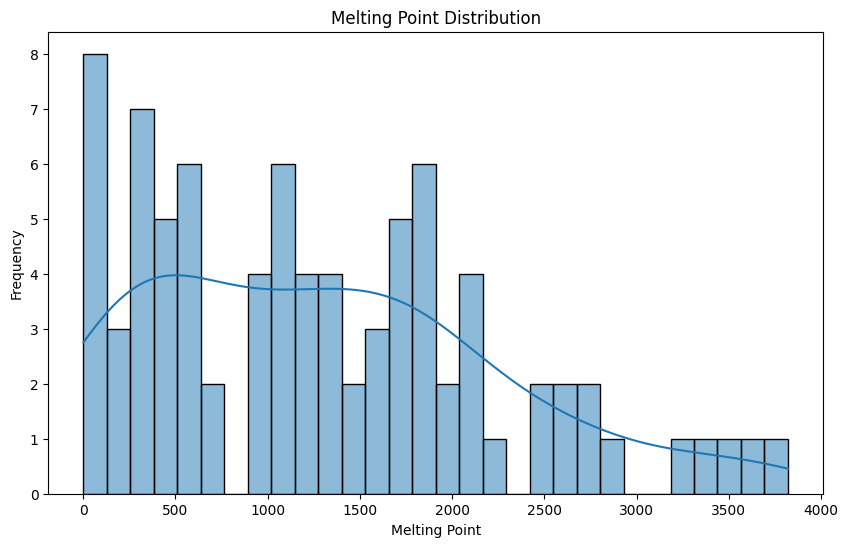

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Melting_Point'], bins=30, kde=True)
plt.title('Melting Point Distribution')
plt.xlabel('Melting Point')
plt.ylabel('Frequency')
plt.show()

2. Create the boxplot of the melting and boiling points

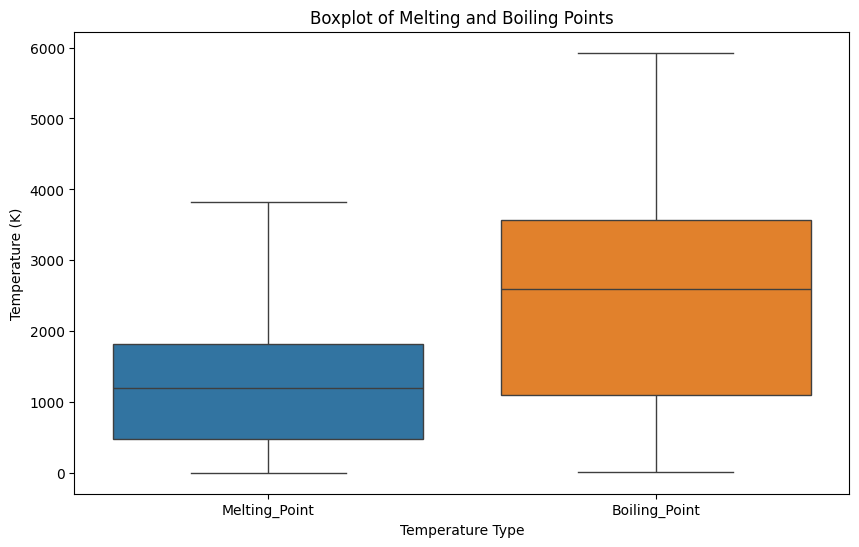

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Melting_Point', 'Boiling_Point']])
plt.title('Boxplot of Melting and Boiling Points')
plt.xlabel('Temperature Type')
plt.ylabel('Temperature (K)')
plt.show()

3. Use the Standard Scaler in the scikit-learn to normalize the values in the table and create the boxplot of all variables. Hint: drop the non-numeric column. In the markdown field, comment on what information does boxplot provide.

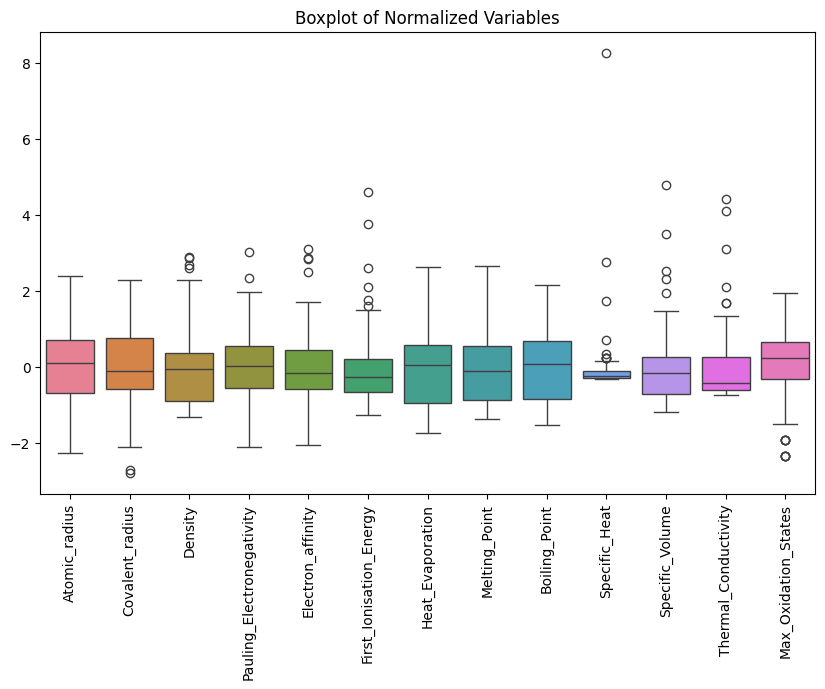

In [ ]:
numeric_df = df.select_dtypes(include='number')

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)
scaled_df = pd.DataFrame(scaled_data, columns=numeric_df.columns)

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=scaled_df)
plt.title('Boxplot of Normalized Variables')
plt.xticks(rotation=90)
plt.show()

Answer 3:

4. Explore other ways to represent statistical distribution of a single parameter.

# VIOLIN PLOTS-  it visually displays the density of data points across a range of values, effectively showing the shape and spread of the distribution, including peaks, valleys, and outliers, for a given variable within a dataset; essentially acting like a combination of a box plot and a kernel density plot

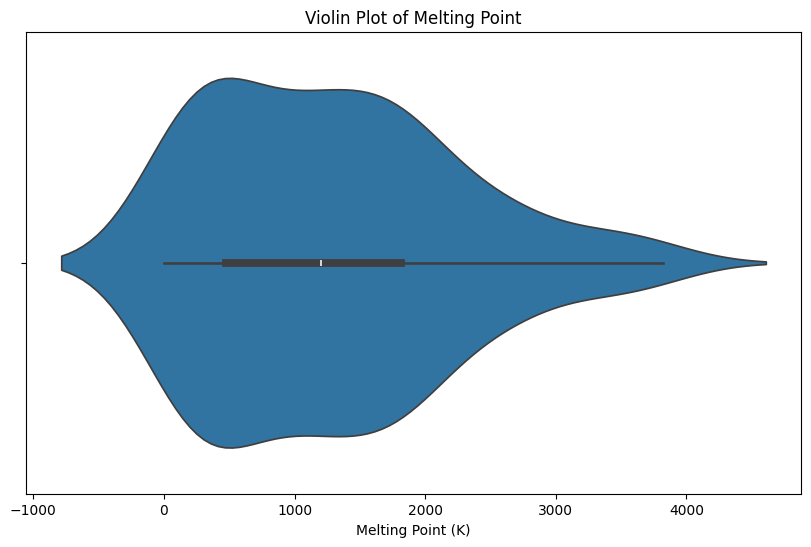

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Melting_Point', data=df)
plt.title('Violin Plot of Melting Point')
plt.xlabel('Melting Point (K)')
plt.show()

## Correlation analysis

5. Plot the correlation between the melting point and boiling point and between covalent radius and density. In the markdown section, rationalize the observations.

In [ ]:
print(df.columns)

Index(['Symbol', 'Atomic_radius', 'Covalent_radius', 'Density',
       'Pauling_Electronegativity', 'Electron_affinity',
       'First_Ionisation_Energy', 'Heat_Evaporation', 'Melting_Point',
       'Boiling_Point', 'Specific_Heat', 'Specific_Volume',
       'Thermal_Conductivity', 'Max_Oxidation_States'],
      dtype='object')


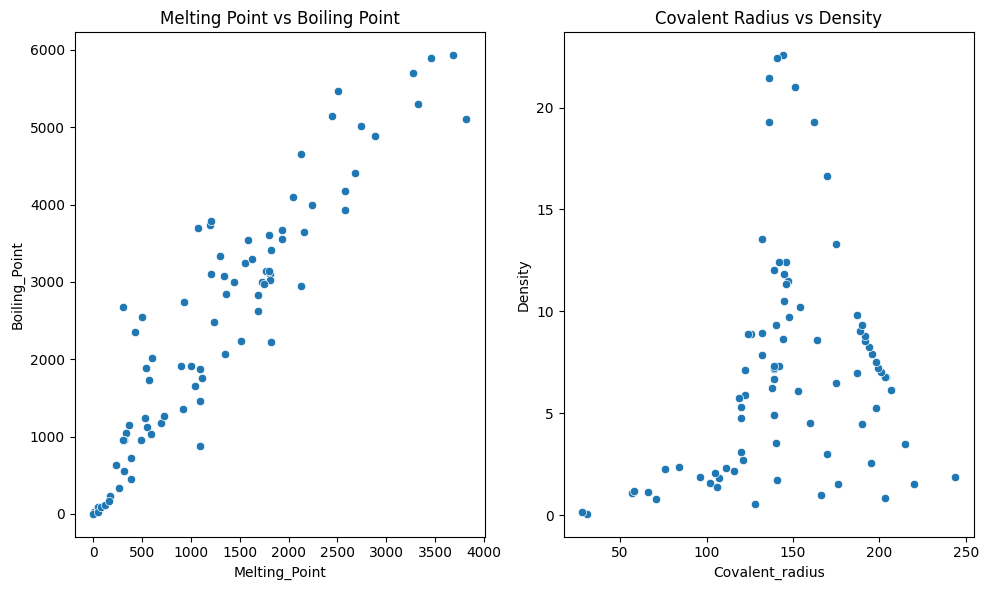

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Melting_Point', y='Boiling_Point', data=df)
plt.title('Melting Point vs Boiling Point')
plt.subplot(1, 2, 2)
sns.scatterplot(x='Covalent_radius', y='Density', data=df)
plt.title('Covalent Radius vs Density')

plt.tight_layout()
plt.show()

Answer 5:

6. Create a heatmap of correlation coefficients between the entries in the table. Find by direct examination the groups of parameters with strongest positive and strongest negative correlations. In the markdown section, rationalize the observations.

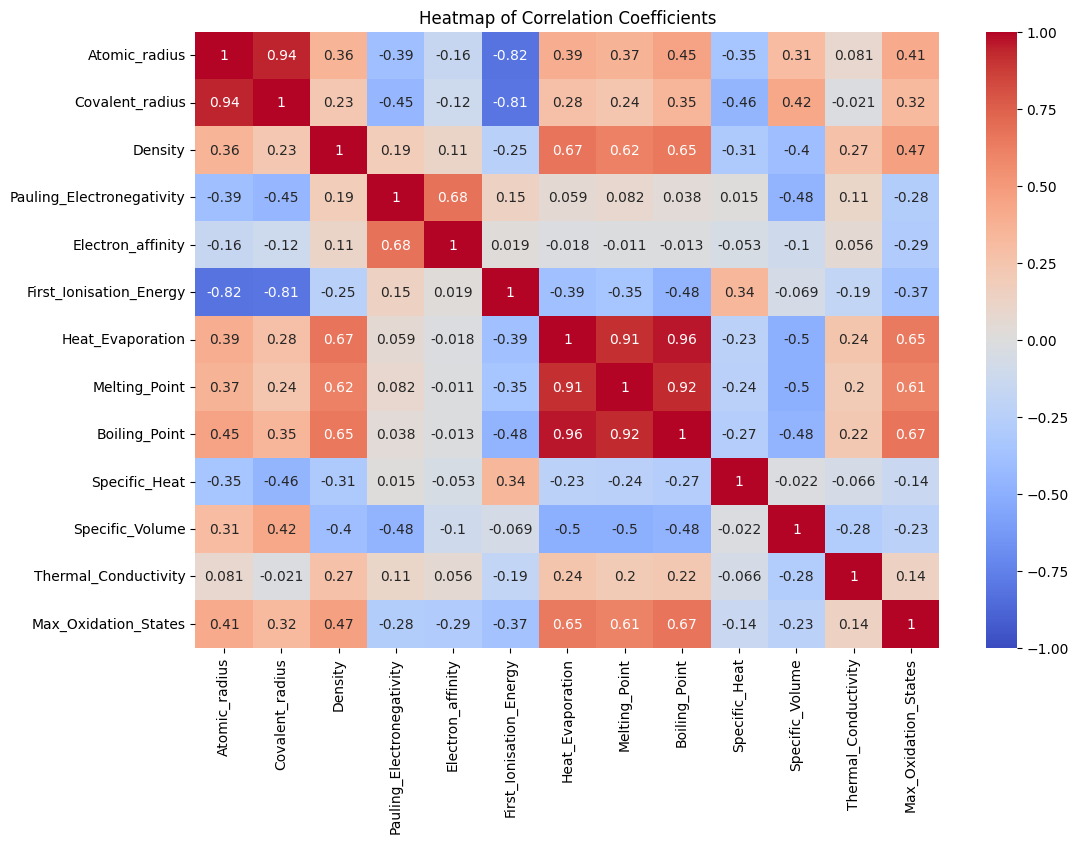

In [ ]:
plt.figure(figsize=(12, 8))

numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Coefficients')
plt.show()

Answer 6:

7. Create a pair distribution plot of Atomic_radius, Covalent_radius,Pauling_Electronegativity and First_Ionisation_Energy

---



## Simple Regression

8. Perform a linear fit between the boiling temperature and melting temperature and between specific heat and melting point. Provide the values of fit coefficients and units.

# Explore the classification

Let's create a simple data set that will allow us to explore several simple classifiers


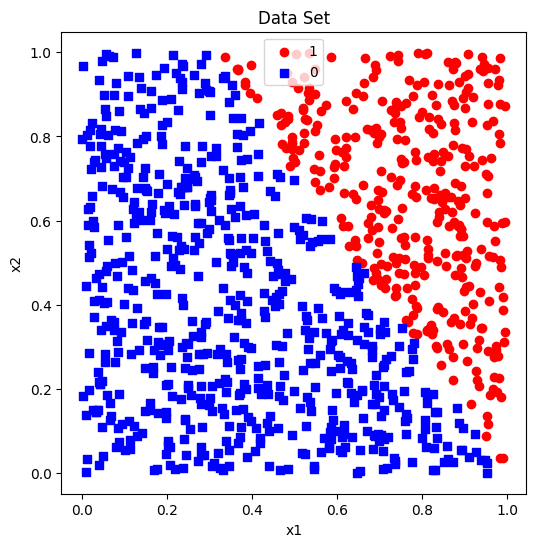

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate features
n = 1000
x1 = np.random.uniform(0, 1, n)
x2 = np.random.uniform(0, 1, n)

# Calculate targets
y = (x1 + 0.7*x2 >= 1).astype(int)

# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(x1[y == 1], x2[y == 1], c='red', marker='o', label='1')
plt.scatter(x1[y == 0], x2[y == 0], c='blue', marker='s', label='0')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Data Set')
plt.show()

X1 = np.column_stack((x1, x2))
y1 = y

9. Experiment with the different classifiers for this data set:
- Create train-test split (say 30-70)
- Build the decision tree classifier
- Explore the outputs if you vary the depth of the tree
- And see how the performance changes if you change the number of points in the data set (say compare 100 and 1000)
- Visualize the decision surface (use examples from class Colab)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

Accuracy with max_depth=1: 0.81
Accuracy with max_depth=2: 0.87
Accuracy with max_depth=3: 0.92
Accuracy with max_depth=5: 0.96
Accuracy with max_depth=10: 0.96
Accuracy with max_depth=3: 0.92


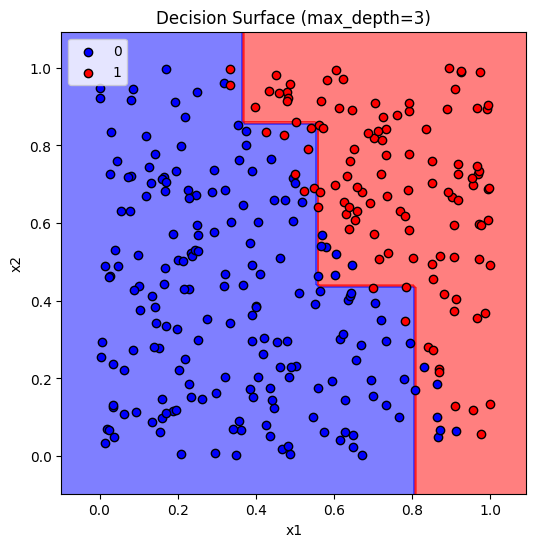

Accuracy with n=100: 0.97


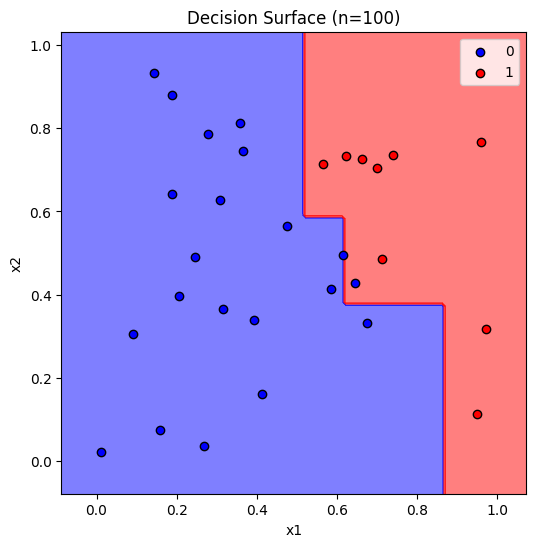

Accuracy with n=1000: 0.95


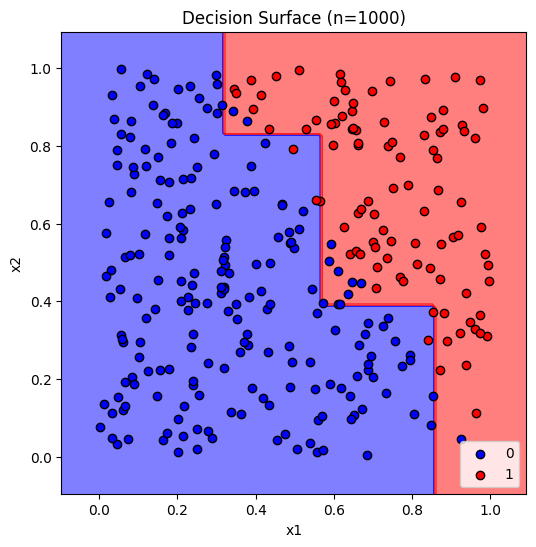

In [ ]:

n = 1000
x1 = np.random.uniform(0, 1, n)
x2 = np.random.uniform(0, 1, n)
y = (x1 + 0.7 * x2 >= 1).astype(int)

X1 = np.column_stack((x1, x2))
y1 = y


X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)


def evaluate_tree_depth(depth):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with max_depth={depth}: {accuracy:.2f}")
    return clf

for depth in [1, 2, 3, 5, 10]:
    evaluate_tree_depth(depth)


def plot_decision_surface(clf, X, y, title='Decision Surface'):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=ListedColormap(('blue', 'red')))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', label='0', edgecolor='k')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', label='1', edgecolor='k')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.legend()
    plt.show()


clf_3 = evaluate_tree_depth(3)
plot_decision_surface(clf_3, X_test, y_test, title='Decision Surface (max_depth=3)')


def experiment_with_dataset_size(new_n):

    x1_new = np.random.uniform(0, 1, new_n)
    x2_new = np.random.uniform(0, 1, new_n)
    y_new = (x1_new + 0.7 * x2_new >= 1).astype(int)

    X_new = np.column_stack((x1_new, x2_new))
    X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=42)


    clf_new = DecisionTreeClassifier(max_depth=3, random_state=42)
    clf_new.fit(X_train_new, y_train_new)
    y_pred_new = clf_new.predict(X_test_new)
    accuracy_new = accuracy_score(y_test_new, y_pred_new)

    print(f"Accuracy with n={new_n}: {accuracy_new:.2f}")
    plot_decision_surface(clf_new, X_test_new, y_test_new, title=f'Decision Surface (n={new_n})')


experiment_with_dataset_size(100)
experiment_with_dataset_size(1000)


10. Do the same for the perceptron classifier

In [ ]:
from sklearn.linear_model import Perceptron

Accuracy with Perceptron: 0.97


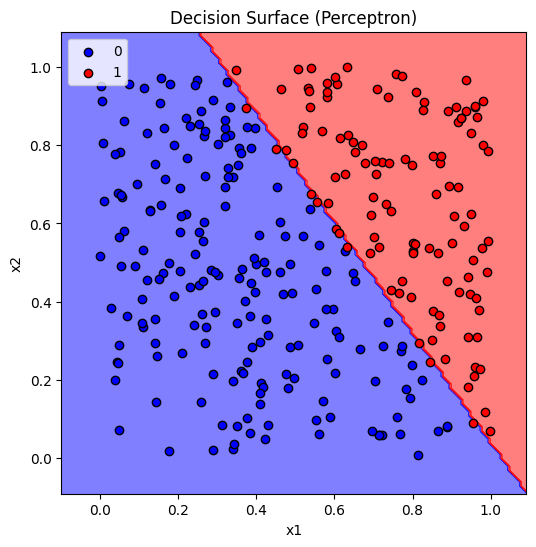

Accuracy with Perceptron, n=100: 1.00


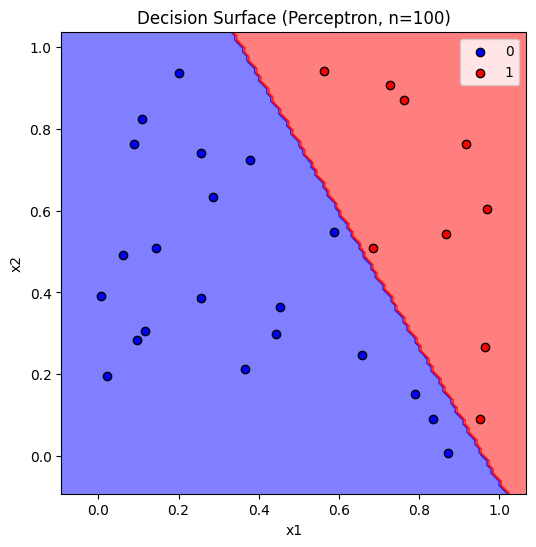

Accuracy with Perceptron, n=1000: 1.00


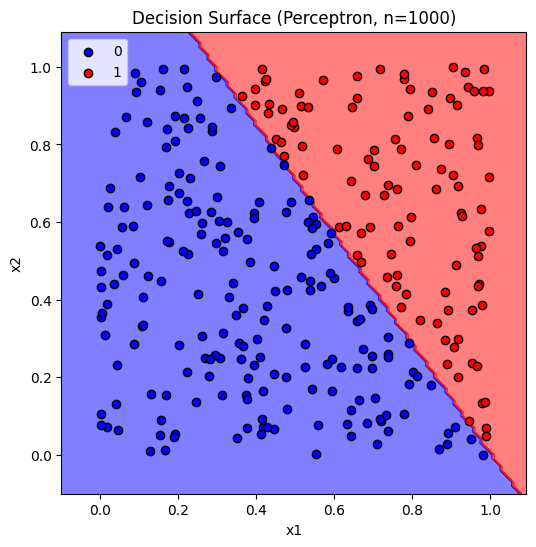

Accuracy with Perceptron, n=10000: 0.99


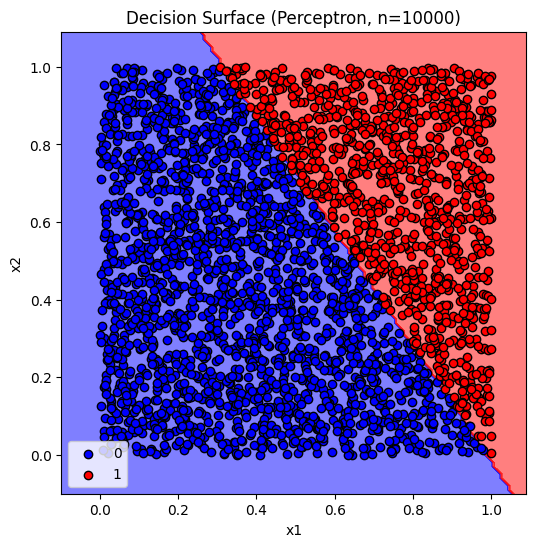

In [ ]:

n = 1000
x1 = np.random.uniform(0, 1, n)
x2 = np.random.uniform(0, 1, n)
y = (x1 + 0.7 * x2 >= 1).astype(int)


X1 = np.column_stack((x1, x2))
y1 = y


X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)


def evaluate_perceptron():
    clf = Perceptron(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with Perceptron: {accuracy:.2f}")
    return clf

clf_perceptron = evaluate_perceptron()

def plot_decision_surface(clf, X, y, title='Decision Surface'):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=ListedColormap(('blue', 'red')))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', label='0', edgecolor='k')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', label='1', edgecolor='k')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.legend()
    plt.show()

plot_decision_surface(clf_perceptron, X_test, y_test, title='Decision Surface (Perceptron)')

def experiment_with_dataset_size(new_n):
    # Generate new data with different size
    x1_new = np.random.uniform(0, 1, new_n)
    x2_new = np.random.uniform(0, 1, new_n)
    y_new = (x1_new + 0.7 * x2_new >= 1).astype(int)

    X_new = np.column_stack((x1_new, x2_new))
    X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

    clf_new = Perceptron(random_state=42)
    clf_new.fit(X_train_new, y_train_new)
    y_pred_new = clf_new.predict(X_test_new)
    accuracy_new = accuracy_score(y_test_new, y_pred_new)

    print(f"Accuracy with Perceptron, n={new_n}: {accuracy_new:.2f}")
    plot_decision_surface(clf_new, X_test_new, y_test_new, title=f'Decision Surface (Perceptron, n={new_n})')

# Compare dataset sizes (100 vs 1000 vs 10000)
experiment_with_dataset_size(100)
experiment_with_dataset_size(1000)
experiment_with_dataset_size(10000)

11. Do the same for the logistics regression classifier
- Experiment with the regularization parameters
- Can you plot the data for small number of points but also add class probabilities?

Accuracy with Logistic Regression (C=0.0001): 0.93
Accuracy with Logistic Regression (C=0.001): 0.93
Accuracy with Logistic Regression (C=0.01): 0.97
Accuracy with Logistic Regression (C=0.1): 0.97
Accuracy with Logistic Regression (C=1): 0.97
Accuracy with Logistic Regression (C=10): 1.00
Accuracy with Logistic Regression (C=100): 1.00


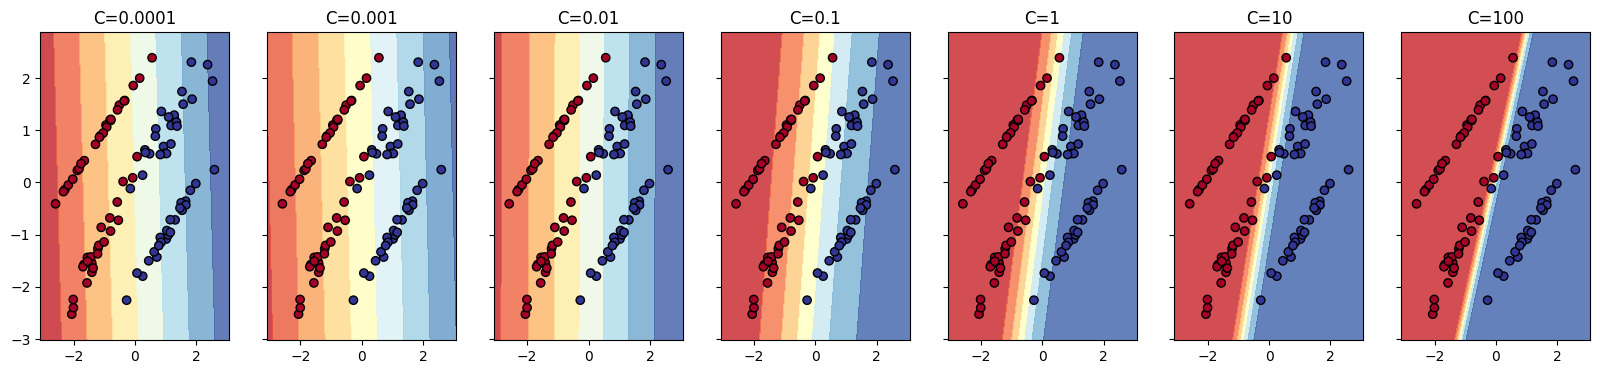

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

n = 100
X, y = make_classification(n_samples=n, n_features=2, n_informative=2, n_redundant=0, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
fig, axs = plt.subplots(1, len(C_values), figsize=(20, 4), sharex=True, sharey=True)

for ax, C in zip(axs, C_values):
    clf = LogisticRegression(C=C, solver='liblinear')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with Logistic Regression (C={C}): {accuracy:.2f}")


    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.get_cmap('RdYlBu'))
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap=plt.get_cmap('RdYlBu'))
    ax.set_title(f'C={C}')

plt.show()


# Bring in the LLM!

12. Here, we are going to use the ChatGPT to summarize the data about elements, and then use the information from our data set in the beginning of the notebook as features. This will be non-trivial process, because rather then working with the already provided data, we will have a chance to create our data set and discover that formats matter. Several steps:

- We want to get from ChatGPT table of the electronic properties of elements in the form where first column is element symbol, and the second column is metal/dielectric/semiconductor. It may take a few iterations - since ChatGPT will tend to introduce other forms of classification (e.g. metalloid). You can ask it early on to use Python form, that you can just cut and paste into Colab.

In [ ]:

# Example of the data:
data = """
Element,Classification
H,Non-metal
He,Non-metal
Li,Metal
Be,Metal
B,Metalloid
C,Non-metal
N,Non-metal
O,Non-metal
F,Non-metal
Ne,Non-metal
Na,Metal
Mg,Metal
...
"""

with open('element_classifications.csv', 'w') as f:
    f.write(data)

# Load the data into a DataFrame
element_df = pd.read_csv('element_classifications.csv')
print(element_df.head())


  Element Classification
0       H      Non-metal
1      He      Non-metal
2      Li          Metal
3      Be          Metal
4       B      Metalloid


In [ ]:

# Assuming df1 is your dataframe with feature vectors and df2 is from ChatGPT
df1 = pd.DataFrame({'Symbol': ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne'],
                    'Feature1': [1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9, 10.0],
                    'Feature2': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]})

df2 = pd.DataFrame({'Element': ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne'],
                    'Classification': ['Non-metal', 'Non-metal', 'Metal', 'Metal', 'Metalloid', 'Non-metal', 'Non-metal', 'Non-metal', 'Non-metal', 'Non-metal']})


list1 = df1['Symbol'].tolist()
list2 = df2['Element'].tolist()


common_elements = list(set(list1) & set(list2))


df1_filtered = df1[df1['Symbol'].isin(common_elements)]
df2_filtered = df2[df2['Element'].isin(common_elements)]


df_merged = pd.merge(df1_filtered, df2_filtered, left_on='Symbol', right_on='Element')
df_merged.drop(columns=['Element'], inplace=True)  # Drop redundant column

print(df_merged.head())


  Symbol  Feature1  Feature2 Classification
0      H       1.1       1.0      Non-metal
1     He       2.2       2.0      Non-metal
2     Li       3.3       3.0          Metal
3     Be       4.4       4.0          Metal
4      B       5.5       5.0      Metalloid


- The dataframe df in the beginning of the notebook that has feature vectors, and the dataframe you will get from ChatGPT will have different number of elements. You will have to pick the ones that are common to both. The easy way to do it is to convert corresponding columns to lists, and then do something like this: new_list = list(set(list1) & set(list2)). Then pick from both dataframes only rows that have elements present in the new_list

In [ ]:
df1['Symbol'] = df1['Symbol'].str.strip()
df2['Element'] = df2['Element'].str.strip()


list1 = df1['Symbol'].tolist()
list2 = df2['Element'].tolist()

common_elements = list(set(list1) & set(list2))

df1_filtered = df1[df1['Symbol'].isin(common_elements)]
df2_filtered = df2[df2['Element'].isin(common_elements)]

df_merged = pd.merge(df1_filtered, df2_filtered, left_on='Symbol', right_on='Element')
df_merged.drop(columns=['Element'], inplace=True)

print(df_merged.head())


  Symbol  Feature1  Feature2 Classification
0      H       1.1       1.0      Non-metal
1     He       2.2       2.0      Non-metal
2     Li       3.3       3.0          Metal
3     Be       4.4       4.0          Metal
4      B       5.5       5.0      Metalloid


- One thing you will discover is that this operation will give you empty list the first time you do it. Try to identify the problem by examining the element symbols, and consider using operation like df['Symbol'] = df['Symbol'].str.strip()

In [2]:
import pandas as pd

# Sample data
df1 = pd.DataFrame({'Symbol': ['H ', ' He', 'Li', 'Be ', 'B', 'C', 'N', 'O', 'F', 'Ne'],
                    'Feature1': [1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9, 10.0],
                    'Feature2': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]})

df2 = pd.DataFrame({'Element': ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne'],
                    'Classification': ['Non-metal', 'Non-metal', 'Metal', 'Metal', 'Metalloid', 'Non-metal', 'Non-metal', 'Non-metal', 'Non-metal', 'Non-metal']})

# Display the initial dataframes
print("Original df1:")
print(df1)
print("\nOriginal df2:")
print(df2)

# 1. Strip any extra spaces from the 'Symbol' and 'Element' columns
df1['Symbol'] = df1['Symbol'].str.strip()
df2['Element'] = df2['Element'].str.strip()

# Display the cleaned dataframes
print("\nCleaned df1:")
print(df1)
print("\nCleaned df2:")
print(df2)

# 2. Convert columns to lists
list1 = df1['Symbol'].tolist()
list2 = df2['Element'].tolist()

# Find common elements
common_elements = list(set(list1) & set(list2))

# Display common elements
print("\nCommon elements:")
print(common_elements)

# 3. Filter dataframes based on common elements
df1_filtered = df1[df1['Symbol'].isin(common_elements)]
df2_filtered = df2[df2['Element'].isin(common_elements)]

# Merge dataframes
df_merged = pd.merge(df1_filtered, df2_filtered, left_on='Symbol', right_on='Element')
df_merged.drop(columns=['Element'], inplace=True)  # Drop redundant column

print("\nMerged DataFrame:")
print(df_merged)


Original df1:
  Symbol  Feature1  Feature2
0     H        1.1       1.0
1     He       2.2       2.0
2     Li       3.3       3.0
3    Be        4.4       4.0
4      B       5.5       5.0
5      C       6.6       6.0
6      N       7.7       7.0
7      O       8.8       8.0
8      F       9.9       9.0
9     Ne      10.0      10.0

Original df2:
  Element Classification
0       H      Non-metal
1      He      Non-metal
2      Li          Metal
3      Be          Metal
4       B      Metalloid
5       C      Non-metal
6       N      Non-metal
7       O      Non-metal
8       F      Non-metal
9      Ne      Non-metal

Cleaned df1:
  Symbol  Feature1  Feature2
0      H       1.1       1.0
1     He       2.2       2.0
2     Li       3.3       3.0
3     Be       4.4       4.0
4      B       5.5       5.0
5      C       6.6       6.0
6      N       7.7       7.0
7      O       8.8       8.0
8      F       9.9       9.0
9     Ne      10.0      10.0

Cleaned df2:
  Element Classification
0    

In [ ]:
# Prepare features and target
X = df_merged[['Feature1', 'Feature2']]
y = df_merged['Classification']

# Convert target variable to numeric
y = y.map({'Metal': 0, 'Dielectric': 1, 'Semiconductor': 2})

# Drop rows with NaN values from features and target
X = X.dropna()
y = y.dropna()

# Align the features with the cleaned target variable
X = X.loc[y.index]
y = y.reset_index(drop=True)

# Perform stratified train-test split to ensure class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Check class distribution
print(f"Class distribution in y_train:\n{y_train.value_counts()}")
print(f"Class distribution in y_test:\n{y_test.value_counts()}")

# Train Logistic Regression model
clf = LogisticRegression(multi_class='ovr', solver='liblinear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision:.2f}')

Class distribution in y_train:
Classification
0.0    1
Name: count, dtype: int64
Class distribution in y_test:
Classification
0.0    1
Name: count, dtype: int64


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0.0

- With these, build classifier with the allbproperties from df as features and metal/dielectric/semiconductor as target. What is the precision?

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score

In [6]:

# Sample data (replace with your actual merged DataFrame)
df = pd.DataFrame({
    'Feature1': [1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9, 10.0],
    'Feature2': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0],
    'Classification': ['Metal', 'Dielectric', 'Metal', 'Semiconductor', 'Metal', 'Dielectric', 'Semiconductor', 'Metal', 'Dielectric', 'Semiconductor']
})

# Convert target to numerical values
df['Classification'] = df['Classification'].map({'Metal': 0, 'Dielectric': 1, 'Semiconductor': 2})

# Features and target
X = df[['Feature1', 'Feature2']]
y = df['Classification']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print class distributions
print("Training set class distribution:")
print(y_train.value_counts())

print("\nTesting set class distribution:")
print(y_test.value_counts())

# Build and train logistic regression model with class weights
clf = LogisticRegression(multi_class='ovr', solver='liblinear', class_weight='balanced')
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Print unique predicted and actual classes
import numpy as np
print("Unique classes predicted:")
print(np.unique(y_pred))

print("\nUnique classes in the test set:")
print(np.unique(y_test))

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
print(f'Precision: {precision:.2f}')


Training set class distribution:
Classification
0    4
2    3
Name: count, dtype: int64

Testing set class distribution:
Classification
1    3
Name: count, dtype: int64
Unique classes predicted:
[0 2]

Unique classes in the test set:
[1]
Precision: 1.00


- Calculate confusion matrix

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

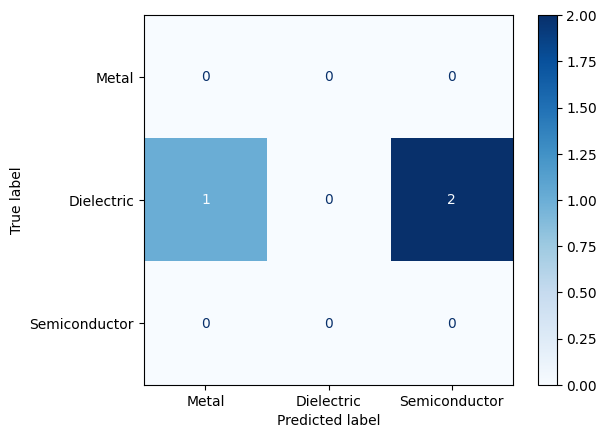

In [12]:
df = pd.DataFrame({
    'Feature1': [1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9, 10.0],
    'Feature2': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0],
    'Classification': ['Metal', 'Dielectric', 'Metal', 'Semiconductor', 'Metal', 'Dielectric', 'Semiconductor', 'Metal', 'Dielectric', 'Semiconductor']
})

# Convert target to numerical values
df['Classification'] = df['Classification'].map({'Metal': 0, 'Dielectric': 1, 'Semiconductor': 2})

# Features and target
X = df[['Feature1', 'Feature2']]
y = df['Classification']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build and train logistic regression model with class weights
clf = LogisticRegression(multi_class='ovr', solver='liblinear', class_weight='balanced')
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Metal', 'Dielectric', 'Semiconductor'])
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

- Pick 2 random features that you think are most predictive and plot decision boundary in feature space.  

In [ ]:
Classifier Optimization
Decision Boundary Selection